In this TD, you must modify this notebook to answer the questions. To do this,

1. Fork this repository
2. Clone your forked repository on your local computer
3. Answer the questions
4. Commit and push regularly

The last commit is due on Sunday, December 1, 11:59 PM. Later commits will not be taken into account.

Install and test PyTorch from  https://pytorch.org/get-started/locally.

# TD2: Deep learning

In [52]:
%pip install torch torchvision

UsageError: Line magic function `%wget` not found.



To test run the following code

In [3]:
import torch

N, D = 14, 10
x = torch.randn(N, D).type(torch.FloatTensor)
print(x)

from torchvision import models

alexnet = models.alexnet()
print(alexnet)

tensor([[ 0.8001, -3.1996,  0.8401, -0.4590,  0.0535,  1.3531,  0.6940, -0.5002,
         -2.4893, -0.2943],
        [-1.4480,  0.6830, -0.0291, -0.8080,  0.6988,  0.0612, -0.7034,  0.5975,
         -0.2097,  0.0544],
        [-0.5039,  0.3342, -0.5135,  0.5781, -0.2265,  0.1315,  1.6636, -0.1691,
         -0.0637,  0.4066],
        [ 1.3856,  1.4038,  0.5262, -0.3644, -1.2894,  0.7763,  0.3176, -0.5977,
         -0.8109, -0.2260],
        [-0.9714,  1.4755,  0.4159,  0.5655, -1.2068,  0.1483,  0.4998,  0.7127,
         -0.3208, -0.1878],
        [ 1.1300,  0.1293, -2.0233,  0.2644, -1.6500,  0.0594, -1.6955,  0.9623,
         -2.0099,  1.4013],
        [ 0.1372,  0.5833, -0.2481,  0.5644, -1.0033,  0.4947, -0.4332, -0.6983,
          0.2427,  1.1333],
        [ 0.5237, -0.4540,  0.3905, -1.3676,  0.1535, -0.8654,  1.1654, -0.3680,
          0.5602,  0.5605],
        [ 0.7205,  1.1636, -0.5012,  1.2403,  0.3021, -0.6127, -0.9504,  1.1685,
          0.0837, -0.5870],
        [ 0.1246, -

## Exercise 1: CNN on CIFAR10

The goal is to apply a Convolutional Neural Net (CNN) model on the CIFAR10 image dataset and test the accuracy of the model on the basis of image classification. Compare the Accuracy VS the neural network implemented during TD1.

Have a look at the following documentation to be familiar with PyTorch.

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

You can test if GPU is available on your machine and thus train on it to speed up the process

In [4]:
import torch

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("CUDA is not available.  Training on CPU ...")
else:
    print("CUDA is available!  Training on GPU ...")

CUDA is available!  Training on GPU ...


Next we load the CIFAR10 dataset

In [6]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# choose the training and test datasets
train_data = datasets.CIFAR10("data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10("data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# specify the image classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

Files already downloaded and verified
Files already downloaded and verified


CNN definition (this one is an example)

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Loss function and training using SGD (Stochastic Gradient Descent) optimizer

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 44.612249 	Validation Loss: 40.298942
Validation loss decreased (inf --> 40.298942).  Saving model ...
Epoch: 1 	Training Loss: 36.004778 	Validation Loss: 33.401573
Validation loss decreased (40.298942 --> 33.401573).  Saving model ...
Epoch: 2 	Training Loss: 30.990529 	Validation Loss: 29.245610
Validation loss decreased (33.401573 --> 29.245610).  Saving model ...
Epoch: 3 	Training Loss: 28.325317 	Validation Loss: 26.954483
Validation loss decreased (29.245610 --> 26.954483).  Saving model ...
Epoch: 4 	Training Loss: 26.341247 	Validation Loss: 26.349700
Validation loss decreased (26.954483 --> 26.349700).  Saving model ...
Epoch: 5 	Training Loss: 24.861439 	Validation Loss: 24.664094
Validation loss decreased (26.349700 --> 24.664094).  Saving model ...
Epoch: 6 	Training Loss: 23.654918 	Validation Loss: 23.904583
Validation loss decreased (24.664094 --> 23.904583).  Saving model ...
Epoch: 7 	Training Loss: 22.659880 	Validation Loss: 24.153002
Epoch

Does overfit occur? If so, do an early stopping.

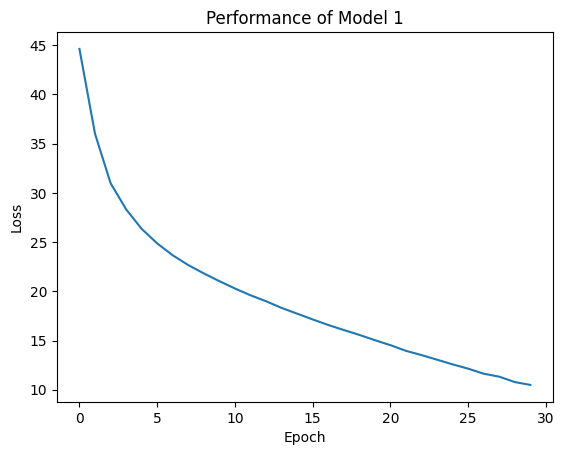

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

Now loading the model with the lowest validation loss value


In [10]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 21.447881

Test Accuracy of airplane: 69% (699/1000)
Test Accuracy of automobile: 77% (776/1000)
Test Accuracy of  bird: 51% (511/1000)
Test Accuracy of   cat: 46% (460/1000)
Test Accuracy of  deer: 46% (460/1000)
Test Accuracy of   dog: 45% (459/1000)
Test Accuracy of  frog: 77% (774/1000)
Test Accuracy of horse: 66% (663/1000)
Test Accuracy of  ship: 79% (792/1000)
Test Accuracy of truck: 69% (699/1000)

Test Accuracy (Overall): 62% (6293/10000)


Build a new network with the following structure.

- It has 3 convolutional layers of kernel size 3 and padding of 1.
- The first convolutional layer must output 16 channels, the second 32 and the third 64.
- At each convolutional layer output, we apply a ReLU activation then a MaxPool with kernel size of 2.
- Then, three fully connected layers, the first two being followed by a ReLU activation and a dropout whose value you will suggest.
- The first fully connected layer will have an output size of 512.
- The second fully connected layer will have an output size of 64.

Compare the results obtained with this new network to those obtained previously.

In [11]:
# define the new CNN architecture

import torch.nn as nn
import torch.nn.functional as F

class Net_new(nn.Module):
    def __init__(self):
        super(Net_new, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # Padding to prevent the output's dimension from changing
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 512) # Input size = nb of channels output on the last layer * pixel size of image (each MaxPool split by two)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x) # Helpful in preventing neuron co-adaptation
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        return x

# create a complete CNN
model_new = Net_new()
print(model_new)
# move tensors to GPU if CUDA is available
if train_on_gpu:
  model_new.cuda()

Net_new(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer_new = optim.SGD(model_new.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list_new = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model_new.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer_new.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model_new(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer_new.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model_new.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model_new(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list_new.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model_new.state_dict(), "model_new_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 46.035736 	Validation Loss: 45.976020
Validation loss decreased (inf --> 45.976020).  Saving model ...
Epoch: 1 	Training Loss: 45.187472 	Validation Loss: 42.525370
Validation loss decreased (45.976020 --> 42.525370).  Saving model ...
Epoch: 2 	Training Loss: 40.269012 	Validation Loss: 36.115885
Validation loss decreased (42.525370 --> 36.115885).  Saving model ...
Epoch: 3 	Training Loss: 35.383565 	Validation Loss: 31.909517
Validation loss decreased (36.115885 --> 31.909517).  Saving model ...
Epoch: 4 	Training Loss: 32.746224 	Validation Loss: 29.787075
Validation loss decreased (31.909517 --> 29.787075).  Saving model ...
Epoch: 5 	Training Loss: 30.653619 	Validation Loss: 27.959262
Validation loss decreased (29.787075 --> 27.959262).  Saving model ...
Epoch: 6 	Training Loss: 28.983543 	Validation Loss: 26.431537
Validation loss decreased (27.959262 --> 26.431537).  Saving model ...
Epoch: 7 	Training Loss: 27.683504 	Validation Loss: 25.174931
Valid

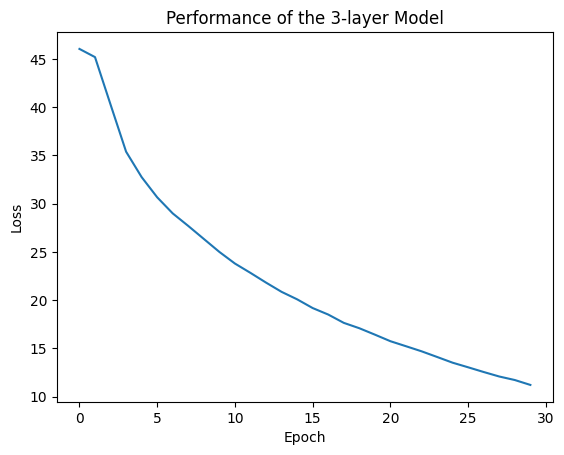

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list_new)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of the 3-layer Model")
plt.show()

In [37]:
model_new.load_state_dict(torch.load("./model_new_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model_new.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_new(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 15.725736

Test Accuracy of airplane: 78% (784/1000)
Test Accuracy of automobile: 83% (838/1000)
Test Accuracy of  bird: 61% (615/1000)
Test Accuracy of   cat: 51% (513/1000)
Test Accuracy of  deer: 68% (680/1000)
Test Accuracy of   dog: 63% (635/1000)
Test Accuracy of  frog: 86% (860/1000)
Test Accuracy of horse: 76% (762/1000)
Test Accuracy of  ship: 84% (845/1000)
Test Accuracy of truck: 82% (821/1000)

Test Accuracy (Overall): 73% (7353/10000)


With our new model, we notice a substantial improvement in overall test accuracy.

The result of the **original CNN** are :

*   *Test loss* : 21.447881
*   *Test accuracy* : 62%

The result of the our **new 3-layers CNN** are :

*   *Test loss* : 15.725736
*   *Test accuracy* : 73%

Despite the additional training period (~1min), the outcomes meet our expectations. Indeed, for each class, the accuracy is improved up to 10%.

## Exercise 2: Quantization: try to compress the CNN to save space

Quantization doc is available from https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic
        
The Exercise is to quantize post training the above CNN model. Compare the size reduction and the impact on the classification accuracy


The size of the model is simply the size of the file.

In [34]:
import os

def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size

size_model = print_size_of_model(model_new, "fp32")

model:  fp32  	 Size (KB): 2331.074


Post training quantization example

In [35]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model_new, {torch.nn.Linear}, dtype=torch.qint8)
torch.save(quantized_model.state_dict(), "quantized_model_cifar.pt")

size_quantized = print_size_of_model(quantized_model, "int8")

print(f"The size of the original model has been divided by {size_model / size_quantized:.2f} compared to the Quantized model")


model:  int8  	 Size (KB): 659.934
The size of the original model has been divided by 3.53 compared to the Quantized model


For each class, compare the classification test accuracy of the initial model and the quantized model. Also give the overall test accuracy for both models.

Try training aware quantization to mitigate the impact on the accuracy (doc available here https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic)

In [40]:
quantized_model.load_state_dict(torch.load("./quantized_model_cifar.pt",map_location=torch.device('cpu')))

# track test loss
test_loss_quantized = 0.0
class_correct_quantized = list(0.0 for i in range(10))
class_total_quantized = list(0.0 for i in range(10))

quantized_model.eval()
quantized_model.cpu()

# iterate over test data
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = quantized_model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss_quantized += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) #np.squeeze(correct_tensor.cpu().numpy()
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct_quantized[label] += correct[i].item()
        class_total_quantized[label] += 1

# average test loss
test_loss_quantized = test_loss_quantized / len(test_loader)
loss_delta = test_loss_quantized - test_loss
print("Original Test Loss: {:.6f}\n".format(test_loss))
print("Quantized Test Loss: {:.6f}\n".format(test_loss_quantized))
print("Loss Delta: {:.6f}\n".format(loss_delta))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Initial model Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            ))
        print(
            "Quantized model Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct_quantized[i] / class_total_quantized[i],
                np.sum(class_correct_quantized[i]),
                np.sum(class_total_quantized[i]),
            ))
        print(
            "Difference in Instances Correctly classified of %5s: %2d \n"
            % (
                classes[i],
                class_correct_quantized[i]-class_correct[i],

            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nInitial model Test Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)
print(
    "\nQuantized model Test Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct_quantized) / np.sum(class_total_quantized),
        np.sum(class_correct_quantized),
        np.sum(class_total_quantized),
    )
)
print(
         "\nDifference in Instances Correctly classified (Overall) : %2d \n"
        % (
            np.sum(class_correct)-np.sum(class_correct_quantized),
            )
        )

Original Test Loss: 15.725736

Quantized Test Loss: 15.745716

Loss Delta: 0.019980

Initial model Test Accuracy of airplane: 78% (784/1000)
Quantized model Test Accuracy of airplane: 78% (786/1000)
Difference in Instances Correctly classified of airplane:  2 

Initial model Test Accuracy of automobile: 83% (838/1000)
Quantized model Test Accuracy of automobile: 83% (837/1000)
Difference in Instances Correctly classified of automobile: -1 

Initial model Test Accuracy of  bird: 61% (615/1000)
Quantized model Test Accuracy of  bird: 61% (611/1000)
Difference in Instances Correctly classified of  bird: -4 

Initial model Test Accuracy of   cat: 51% (513/1000)
Quantized model Test Accuracy of   cat: 51% (512/1000)
Difference in Instances Correctly classified of   cat: -1 

Initial model Test Accuracy of  deer: 68% (680/1000)
Quantized model Test Accuracy of  deer: 68% (681/1000)
Difference in Instances Correctly classified of  deer:  1 

Initial model Test Accuracy of   dog: 63% (635/1000

The quantization of our model has minimal impact on classification accuracy, with the Test Loss and number of correctly classified instances remaining consistent across both models. This quantization is a beneficial method for saving space and memory, as the quantized file is 3.53 times smaller.

## Exercise 3: working with pre-trained models.

PyTorch offers several pre-trained models https://pytorch.org/vision/0.8/models.html        
We will use ResNet50 trained on ImageNet dataset (https://www.image-net.org/index.php). Use the following code with the files `imagenet-simple-labels.json` that contains the imagenet labels and the image dog.png that we will use as test.


Predicted class for resnet50 is: Alpine ibex
Predicted class for googlenet is: hartebeest
Predicted class for resnet_quantized is: Alpine ibex
Predicted class for googlenet_quantized is: hartebeest


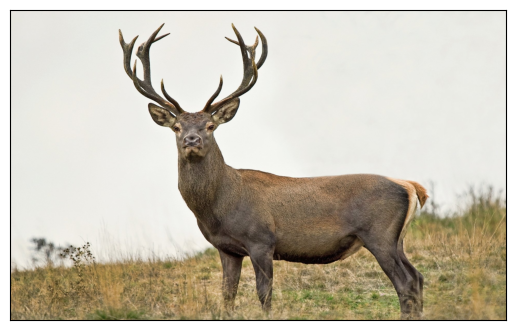

In [45]:
import json
from PIL import Image


# Choose an image to pass through the model
test_image_1 = "dog.png"
test_image_2 = "ours.jpg"
test_image_3 = "cerf.jpg"


# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image_3)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
googlenet_model = models.googlenet(pretrained=True)
resnet_quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
googlenet_quantized_model = torch.quantization.quantize_dynamic(googlenet_model, dtype=torch.qint8)

# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()
googlenet_model.eval()
resnet_quantized_model.eval()
googlenet_quantized_model.eval()

# Get the 1000-dimensional model output
out_1 = model(image)
out_2 = googlenet_model(image)
out_3 = resnet_quantized_model(image)
out_4 = googlenet_quantized_model(image)

# Find the predicted class
print("Predicted class for resnet50 is: {}".format(labels[out_1.argmax()]))
print("Predicted class for googlenet is: {}".format(labels[out_2.argmax()]))
print("Predicted class for resnet_quantized is: {}".format(labels[out_3.argmax()]))
print("Predicted class for googlenet_quantized is: {}".format(labels[out_4.argmax()]))

Experiments:

Study the code and the results obtained. Possibly add other images downloaded from the internet.

What is the size of the model? Quantize it and then check if the model is still able to correctly classify the other images.

Experiment with other pre-trained CNN models.

    


We tried to experiment the Resnet50 and GoogleNet with three different image. The results are satisfying for the two first image "dog.png", and "ours.jpg", but not for the "cerf.jpg". Indeed, the predicted class for resnet50 model : Alpine ibex and the predicted class for googlenet is: hartebeest.

In [49]:
#sizes of the model

print("Size of the 3-layers model :")
size_model = print_size_of_model(model_new, "fp32")
print("Size of the 3-layers quantized model :")
size_quantized = print_size_of_model(quantized_model, "int8")
print("The size of the model has been divided by %.2f compared to the Quantized model" % (size_model / size_quantized))

print("\nSize of the Resnet model :")
size_Resnet = print_size_of_model(model, "fp32")
print("Size of the Resnet quantized model :")
size_Quantized_Resnet = print_size_of_model(resnet_quantized_model, "fp32")
print("The size of the original model has been divided by %.2f compared to the 3-layer Quantized model" % (size_Quantized_Resnet / size_quantized))

print("\nSize of Googlenet model:")
size_Googlenet = print_size_of_model(googlenet_model, "fp32")
print("Size of Googlenet quantized model:")
size_Quantized_Googlenet = print_size_of_model(googlenet_quantized_model, "fp32")
print("The size of the original model has been divided by %.2f compared to the 3-layer Quantized model" % (size_Quantized_Googlenet / size_quantized))


Size of the 3-layers model :
model:  fp32  	 Size (KB): 2331.074
Size of the 3-layers quantized model :
model:  int8  	 Size (KB): 659.806
The size of the model has been divided by 3.53 compared to the Quantized model

Size of the Resnet model :
model:  fp32  	 Size (KB): 102523.238
Size of the Resnet quantized model :
model:  fp32  	 Size (KB): 96379.996
The size of the original model has been divided by 146.07 compared to the 3-layer Quantized model

Size of Googlenet model:
model:  fp32  	 Size (KB): 26654.254
Size of Googlenet quantized model:
model:  fp32  	 Size (KB): 23583.076
The size of the original model has been divided by 35.74 compared to the 3-layer Quantized model


Even after quantization, the pretrained models are far larger than our own trained model.

## Exercise 4: Transfer Learning
    
    
For this work, we will use a pre-trained model (ResNet18) as a descriptor extractor and will refine the classification by training only the last fully connected layer of the network. Thus, the output layer of the pre-trained network will be replaced by a layer adapted to the new classes to be recognized which will be in our case ants and bees.
Download and unzip in your working directory the dataset available at the address :
    
https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Execute the following code in order to display some images of the dataset.

In [62]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

--2023-11-29 14:50:16--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 52.84.162.53, 52.84.162.20, 52.84.162.79, ...
Connecting to download.pytorch.org (download.pytorch.org)|52.84.162.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   269MB/s    in 0.2s    

2023-11-29 14:50:17 (269 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/tra

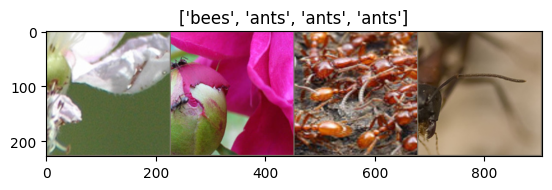

In [63]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=0
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



Now, execute the following code which uses a pre-trained model ResNet18 having replaced the output layer for the ants/bees classification and performs the model training by only changing the weights of this output layer.

In [64]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can als

Epoch 1/10
----------



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 0.6364 Acc: 0.6393
val Loss: 0.2647 Acc: 0.9020

Epoch 2/10
----------
train Loss: 0.4570 Acc: 0.7869
val Loss: 0.1833 Acc: 0.9542

Epoch 3/10
----------
train Loss: 0.4736 Acc: 0.7664
val Loss: 0.4388 Acc: 0.8170

Epoch 4/10
----------
train Loss: 0.4314 Acc: 0.8197
val Loss: 0.1674 Acc: 0.9542

Epoch 5/10
----------
train Loss: 0.4656 Acc: 0.7869
val Loss: 0.3148 Acc: 0.8693

Epoch 6/10
----------
train Loss: 0.4158 Acc: 0.8156
val Loss: 0.1935 Acc: 0.9477

Epoch 7/10
----------
train Loss: 0.3942 Acc: 0.8238
val Loss: 0.1821 Acc: 0.9477

Epoch 8/10
----------
train Loss: 0.3159 Acc: 0.8443
val Loss: 0.1472 Acc: 0.9542

Epoch 9/10
----------
train Loss: 0.4447 Acc: 0.8156
val Loss: 0.1634 Acc: 0.9542

Epoch 10/10
----------
train Loss: 0.3563 Acc: 0.8648
val Loss: 0.1460 Acc: 0.9608

Training complete in 0m 38s
Best val Acc: 0.960784


Experiments:
Study the code and the results obtained.

Modify the code and add an "eval_model" function to allow
the evaluation of the model on a test set (different from the learning and validation sets used during the learning phase). Study the results obtained.

Now modify the code to replace the current classification layer with a set of two layers using a "relu" activation function for the middle layer, and the "dropout" mechanism for both layers. Renew the experiments and study the results obtained.

Apply ther quantization (post and quantization aware) and evaluate impact on model size and accuracy.

In [68]:
# Function to evaluate the accuracy of the model on a test folder of images from the internet
def eval_mode(model):

    # track test loss
    test_loss = 0.0
    class_correct = list(0.0 for i in range(10))
    class_total = list(0.0 for i in range(10))

    model.eval()
    # iterate over test data
    for data, target in test_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update test loss
        test_loss += loss.item() * data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct_tensor = pred.eq(target.data.view_as(pred))
        correct = (
            np.squeeze(correct_tensor.numpy())
            if not train_on_gpu
            else np.squeeze(correct_tensor.cpu().numpy())
        )
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # average test loss
    test_loss = test_loss / len(test_loader)
    print(f"Test Loss: {test_loss:.6f}\n")

    for i in range(10):
        if class_total[i] > 0:
            accuracy = 100 * class_correct[i] / class_total[i]
            print(f"Test Accuracy of {classes[i]}: {accuracy:.2f}% "
                  f"({int(np.sum(class_correct[i]))}/{int(np.sum(class_total[i]))})")
        else:
            print(f"Test Accuracy of {classes[i]}: N/A (no training examples)")

    overall_accuracy = 100.0 * np.sum(class_correct) / np.sum(class_total)
    print(f"\nTest Accuracy (Overall): {overall_accuracy:.2f}% "
          f"({int(np.sum(class_correct))}/{int(np.sum(class_total))})")

In [73]:
# Get a pre-trained ResNet18 model
new_resNet18 = torchvision.models.resnet18(pretrained=True)
for param in new_resNet18.parameters():
    param.requires_grad = False

new_resNet18.parameters = new_resNet18.parameters

# First classification layer
in_features = new_resNet18.fc.in_features
out_features = 16
new_resNet18.fc = nn.Linear(in_features, out_features)
new_resNet18.fc = nn.Linear(in_features, out_features)

# Second classification layer where we use a "relu" activation function for this middle layer
new_resNet18.fc2 = nn.Linear(out_features, 2)
def new_forward(self, x):
    x = self.forward(x)
    x = F.relu(self.fc2(self.drop(x)))
    return x

# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(new_resNet18.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
val_loss, train_loss, val_accuracy, train_accuracy = [], [], [], []
new_resNet18, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)

Epoch 1/10
----------
train Loss: 0.3299 Acc: 0.8648
val Loss: 0.2005 Acc: 0.9216

Epoch 2/10
----------
train Loss: 0.2750 Acc: 0.8852
val Loss: 0.1635 Acc: 0.9542

Epoch 3/10
----------
train Loss: 0.3416 Acc: 0.8852
val Loss: 0.1855 Acc: 0.9412

Epoch 4/10
----------
train Loss: 0.3332 Acc: 0.8730
val Loss: 0.1760 Acc: 0.9412

Epoch 5/10
----------
train Loss: 0.4095 Acc: 0.7910
val Loss: 0.1562 Acc: 0.9608

Epoch 6/10
----------
train Loss: 0.3044 Acc: 0.8648
val Loss: 0.1869 Acc: 0.9412

Epoch 7/10
----------
train Loss: 0.4713 Acc: 0.8074
val Loss: 0.1606 Acc: 0.9542

Epoch 8/10
----------
train Loss: 0.4518 Acc: 0.7992
val Loss: 0.1718 Acc: 0.9412

Epoch 9/10
----------
train Loss: 0.3761 Acc: 0.8607
val Loss: 0.1974 Acc: 0.9216

Epoch 10/10
----------
train Loss: 0.3483 Acc: 0.8607
val Loss: 0.1934 Acc: 0.9412

Training complete in 0m 37s
Best val Acc: 0.960784


In [74]:
import torchvision.models as models
new_resNet18_quantized = torch.quantization.quantize_dynamic(new_resNet18, dtype=torch.qint8)

size_resNet18 = print_size_of_model(new_resNet18, "fp32")
size_resNet18_quantized = print_size_of_model(new_resNet18_quantized, "fp32")

print(
    "\nThe size of the resNet18 model is %.2fMB, %.0f times bigger than the resNet18_quantized model"
    % (
        size_resNet18 / 1000000,
        size_resNet18 / size_resNet18_quantized
    )
)

model:  fp32  	 Size (KB): 44782.148
model:  fp32  	 Size (KB): 44779.834

The size of the resNet18 model is 44.78MB, 1 times bigger than the resNet18_quantized model


## Optional
    
Try this at home!!


Pytorch offers a framework to export a given CNN to your selfphone (either android or iOS). Have a look at the tutorial https://pytorch.org/mobile/home/

The Exercise consists in deploying the CNN of Exercise 4 in your phone and then test it on live.



## Author

Alberto BOSIO - Ph. D.